# Pdf to txt

Ucitavanje pdf-ova da bi se mogle izdvojiti stop rijeci iz knjiga

In [ ]:
pdf_File_Object = open('ruza.pdf', 'rb')  
pdf_Reader = PDF.PdfReader(pdf_File_Object)  
print("No. of pages in the given PDF file: ", len(pdf_Reader.pages))  

In [ ]:
for i in range(len(pdf_Reader.pages)):
  page_Object = pdf_Reader.pages[i]  
  if i == 0:
    data = page_Object.extract_text() 
  else:
    data += page_Object.extract_text() 

In [ ]:
file = open(r"ruza.txt", "a")
file.writelines(data)

In [ ]:
pdf_File_Object.close() 

#Biblioteke

In [ ]:
!pip install feedparser
!pip install gensim

import feedparser
import re
import nltk
from nltk import tokenize
from gensim.models import Word2Vec
from gensim.models import FastText
import pickle
import random
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=2e7934f9acd52dc2ff5fad19e1d9fa6fa6a552288e52e50d6d2009697ecd9a52
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#Stop riječi

Analiza koje riječi bi mogle biti stop riječi

In [ ]:
with open('amanet-bazdulj-nura-hubijar-pdf-free-4-153.txt') as f:
    #lines = f.readlines()
    
    lines =  " ".join(line.strip("\n") for line in f) 

In [ ]:
lines

"Pred dolazak juna, ili istom njegovim dolaskom, studenti su postajali svjesni da osim landranja, druženja, plesnjaka u Slozi i Fisu, večeri na klupi pored Parkuše, sati provedenih u prvim sarajevskim kafićima, postoje i ispitne obaveze. Noseći svoju melanholiju dostojanstveno kao plašt i obavezno kao torbicu, rijetko sam bila u društvu svojih vršnjaka nošenih talasima mladosti, ludosti i snova. Moja duša je zavičaj nalazila u noći, vjetru, zvijezdama. Često sam odlazila u Kinoteku, slušala ploče Inglberta Humperdinga, Toma Jonesa, Denisa Russosa, Raya Charlesa... Družila sam se jedino s Hanadi, koja je također bila sklona melanholiji a bilo je perioda kada je zapadala u prava depresivna raspoloženja. Tako je bilo i sredinom juna s početka sedamdesetih. Odlučile smo poći u Kinoteku pogledati ,,Casablanku”. Izabrale smo termin u pet sati poslije podne. Dok je mene film naprosto razderao u komadiće, ona jedva da ga je mogla slijediti. Misli su joj bile uz Faruka, mladića s kojim joj se u

In [ ]:
from collections import Counter
  
# split() returns list of all the words in the string
split_it = lines.split()
  
# Pass the split_it list to instance of Counter class.
Counter = Counter(split_it)
  
# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = Counter.most_common(50)
  
print(most_occur)

[('je', 1724), ('i', 1126), ('se', 939), ('u', 884), ('da', 868), ('sam', 821), ('na', 439), ('ne', 328), ('-', 328), ('to', 312), ('mi', 298), ('su', 254), ('kao', 253), ('što', 249), ('za', 248), ('li', 228), ('nije', 215), ('me', 195), ('s', 189), ('od', 187), ('a', 177), ('ti', 175), ('ni', 172), ('bi', 164), ('ga', 156), ('bila', 150), ('kako', 149), ('samo', 143), ('si', 141), ('mu', 139), ('sve', 131), ('koji', 126), ('nešto', 124), ('te', 122), ('iz', 114), ('smo', 113), ('ali', 109), ('bio', 106), ('bilo', 104), ('nisam', 104), ('o', 101), ('više', 96), ('bih', 93), ('ja', 91), ('će', 90), ('kad', 87), ('do', 84), ('U', 82), ('po', 82), ('ili', 80)]


In [ ]:
# opening the file in read mode
my_file = open("stopwords-bos.txt", "r")
  
# reading the file
data = my_file.read()
  
# replacing end of line('/n') with ' ' and
# splitting the text it further when '.' is seen.
data_into_list = data.replace('\n', '. ').split(".")
  
# printing the data
print(data_into_list)
stopwords = data_into_list
my_file.close()

['a', ' ako', ' ali', ' bi', ' bih', ' bila', ' bili', ' bilo', ' bio', ' bismo', ' biste', ' biti', ' da', ' do', ' duž', ' ga', ' hoće', ' hoćemo', ' hoćete', ' hoćeš', ' hoću', ' i', ' iako', ' ih', ' ili', ' iz', ' ja', ' je', ' jedna', ' jedne', ' jedno', ' jer', ' jesam', ' jesi', ' jesmo', ' jest', ' jeste', ' jesu', ' joj', ' još', ' ju', ' kada', ' kako', ' kao', ' koja', ' koje', ' koji', ' kojima', ' koju', ' kroz', ' li', ' me', ' mene', ' meni', ' mi', ' mimo', ' moj', ' moja', ' moje', ' mu', ' na', ' nad', ' nakon', ' nam', ' nama', ' nas', ' naš', ' naša', ' naše', ' našeg', ' ne', ' nego', ' neka', ' neki', ' nekog', ' neku', ' nema', ' neko', ' neće', ' nećemo', ' nećete', ' nećeš', ' neću', ' nešto', ' ni', ' nije', ' nikoga', ' nikoje', ' nikoju', ' nisam', ' nisi', ' nismo', ' niste', ' nisu', ' njega', ' njegov', ' njegova', ' njegovo', ' njemu', ' njezin', ' njezina', ' njezino', ' njen', ' njena', ' njeno', ' njih', ' njihov', ' njihova', ' njihovo', ' njim', ' 

In [ ]:
def remove_stopwords(text, stopwords):
  textwords = text.split()
  #print(textwords)
  resultwords = [word for word in textwords if word.lower() not in stopwords]
  #print(resultwords)

  result = ' '.join(resultwords)
  #print(result)
  #print(stopwords)
  return result


In [ ]:
r = remove_stopwords(lines, stopwords)

#Tokenizacija i preprocesiranje

In [ ]:
#tokenizacija i preprocesiranje
def tokeniziraj(text):
    
    text = text.replace('\\n', '').replace('\\t', '') #.replace('(\\\\\w+)+', '')
    
    text = re.sub(r'\d+\.', '', text) #remove 500., 4.4.
    text = re.sub(r'[0-9]', '', text)
    text = text.lower()

    sentences = re.split(r'[.!?]+', text)
    word_list = []

    for i in range(len(sentences)):
      index = sentences[i].find('izvor:')
      if (index == -1):
        sentences[i] = re.sub(r'[^\w\s]','', sentences[i])
        words = sentences[i].strip().split()
        word_list.extend(words)

    return word_list

# Stemming

In [ ]:
samoglasnici = ['a', 'i', 'e', 'o', 'u']
suglasnici = ['b', 'c', 'č', 'ć', 'd', 'đ', 'dž', 'f', 'g', 'h', 'j', 'k', 'l', 'lj', 'm', 'n', 'nj', 'p', 'r', 's', 'š', 't', 'v', 'z', 'ž']

def stem(rijec):
  rijec = rijec.lower()
  duzina = len(rijec)

  #brojevi - osnovni
  if rijec.endswith(('jedan', 'dva', 'tri', 'cetiri', 'pet', 'sest', 'sedam', 'osam', 'devet', 'deset')) :
    return rijec

  #prilozi koji imaju 'nastavke'
  if rijec in ['daleko', 'teško', 'namjerno', 'mnogo', 'blizu', 'dolje', 'donekle', 'dotle', 'gore', 'gdje', 'odavdje', 'ovdje', 'ondje', 'tamo', 'ovamo', 'onamo',
               'kuda', 'kamo', 'naprijed', 'natrag', 'ikamo', 'nekamo', 'podalje', 'dalje', 'bliže', 'ponegdje', 'pozadi', 'sprijeda', 'straga', 'tu', 'vani', 'unutra',
               'sutra', 'kada', 'tada', 'ikada', 'odavno', 'odiskona', 'prije', 'maloprije', 'nekada', 'nikada', 'lani', 'preklani', 'brzo', 'sporo', 'kako', 'kojekako',
               'ovako', 'tako', 'nekako', 'nikako', 'svakojako', 'stoga', 'namjerno', 'milo', 'ovoliko', 'oniliko', 'premalo', 'premnogo', 'previše', 'više',
               'vrlo', 'malo', 'brže', 'dosta', 'puno', 'svuda', 'jednom', 'dvaput', 'triput', 'baš', 'među', 'samo', 'uskoro', 'tokom', 'nekoliko', 'među', 'između',
               'dakle'] :
               return rijec

  #prijedlozi:
  if rijec in ['poslije', 'u', 'na', 'iza', 'sa', 's', 'po', 'za', 'kroz', 'od', 'preko', 'prije', 'radi' ] :
    return rijec

  #glagoli svedeni na 3. lice jednine srednjeg roda jer infinitiv često ima drugačiji oblik (a radi lakšeg raspoznavanja)
  #proizvela, proizveo -> proizvelo
  #napisao, napisala -> napisalo

  #glagoli - 3. lice jednine srednjeg roda - proizv-elo, urad-ilo, opr-alo
  if duzina > 4 and rijec[-3] in samoglasnici and rijec[-2:] == 'lo':
    return rijec

  #glagoli - 3. lice jednine muškog roda - proizv-eo, urad-io, opr-ao
  if duzina > 3 and rijec[-2] in samoglasnici and rijec[-1] == 'o':
    rijec = rijec[:-1] + "lo"
    return rijec

  #glagoli - 3. lice jednine ženskog roda - proizv-ela, urad-ila, opr-ala, napis-ala
  #glagoli - 3. lice množine ženskog roda - proizv-ele, urad-ile, opr-ale, napis-ale
  #glagoli - 3. lice množine muškog i srednjeg roda - proizv-ela, urad-ili, opr-ali, napis-ali
  if duzina > 4 and rijec[-3] in samoglasnici and (rijec[-2:] in ['la', 'le', 'li']):
    rijec = rijec[:-2] + "lo"
    return rijec
 

  #imenice i brojevi - padezi
  #redoslijed ispitivanja bitan

  #americkim, drzavnim, poslovnim, pješačkih, poslovnih
  if(duzina > 4 and (rijec[-2:] == "im" or rijec[-2:] == "ih" or rijec[-2:] == "og")):
    rijec = rijec[:-2]

  #nastavak 'ima'
  #imenice muškog ili ženskog roda čiji dativ, instrumental ili lokativ množine završava na -ima - jelen-ima, momc-ima, televizor-ima, ljud-ima, kćer-ima
  elif(duzina > 4 and  rijec[-4] in suglasnici and rijec[-3:] == 'ima') :
    rijec = rijec[:-3]
    duzina = len(rijec)

    #umetak ev - panj-ev-ima, put-ev-ima
    if(duzina > 4 and rijec[-2:] == 'ev') :
      rijec = rijec[:-2]

    #umetak ov - rad-ov-ima, tip-ov-ima
    elif(duzina > 4 and rijec[-2:] == 'ov') :
      rijec = rijec[:-2]


  #nastavak 'ama'
  #imenice ženskog roda čiji dativ, instrumental ili lokativ množine završava na -ama - žen-ama, pilan-ama
  elif(duzina > 4 and rijec[-4] in suglasnici and rijec[-3:] == 'ama') :
    rijec = rijec[:-3]

  #nastavak 'iju'
  #imenice koje u genitivu imaju nastavak -iju -prst-iju, gost-iju
  elif(duzina > 4 and rijec[-4] in suglasnici and rijec[-3:] == 'iju') :
    rijec = rijec[:-3]


  #nastavak 'om'
  #imenice muškog roda čiji instrumental jednine završava na -om - jelen-om, momk-om, televizor-om, pacov-om
  elif(duzina > 3 and rijec[-3] in suglasnici and rijec[-2:] == 'om') :
    rijec = rijec[:-2]

  #nastavak 'em'
  #imenice muškog roda čiji instrumental jednine završava na -em - čitaoc-em
  elif(duzina > 3 and rijec[-3] in suglasnici and rijec[-2:] == 'em') :
    rijec = rijec[:-2]
    

  #nastavak 'a'
  #imenice muškog roda čiji genitiv (ili akuzativ) jednine završava na -a - slikar-a, grad-a, prostor-a, uspjeh-a, stol-a, kompjuter-a
  #imenice ženskog roda u nominativu jednine - djevojk-a, učiteljic-a, sreć-a, slog-a
  elif(duzina > 3 and rijec[-2] in suglasnici and rijec[-1] == 'a') :
    rijec = rijec[:-1]
    duzina = len(rijec)

    #umetak ev - panj-ev-a, put-ev-a
    if(duzina > 4 and rijec[-2:] == 'ev') :
      rijec = rijec[:-2]

    #umetak ov - rad-ov-a, tip-ov-a
    elif(duzina > 4 and rijec[-2:] == 'ov') :
      rijec = rijec[:-2]

  #nastavak 'e'
  #imenice muškog roda čiji genitiv (ili vokativ) jednine završava na -e - neznalic-e, kadij-e, arhitekt-e, Alij-e (jelen-e)
  #imenice ženskog roda čiji genitiv jednine završava na -e - Bosn-e, Fatim-e, učiteljic-e, vod-e
  #imenice srednjeg roda u nominativu jednine - čekanj-e, cvijeć-e, koplj-e, lic-e, proljeć-e
  elif(duzina > 3 and rijec[-2] in suglasnici and rijec[-1] == 'e') :
    rijec = rijec[:-1]

  #nastavak 'i'
  #imenice ženskog roda čiji genitiv jednine završava na -i - mladost-i, radost-i, čast-i, večer-i
  #imenice muškog roda čiji nominativ množine završava na -i - jelen-i, prozor-i, čistač-i, televizor-i
  elif(duzina > 3 and rijec[-2] in suglasnici and rijec[-1] == 'i') :
    rijec = rijec[:-1]
    duzina = len(rijec)

    #umetak ev - panj-ev-i, put-ev-i
    if(duzina > 4 and rijec[-2:] == 'ev') :
      rijec = rijec[:-2]

    #umetak ov - rad-ov-i, tip-ov-i
    elif(duzina > 4 and rijec[-2:] == 'ov') :
      rijec = rijec[:-2]

  #nastavak 'o'
  #imenice srednjeg roda u nominativu jednine - sel-o, čud-o, pism-o, jezer-o, neb-o, ok-o
  elif(duzina > 3 and rijec[-2] in suglasnici and rijec[-1] == 'o') :
    rijec = rijec[:-1]

  #nastavak 'u'
  #imenice muškog roda čiji dativ jednine završava na -u - prozor-u, jelen-u, televizor-u, pitanj-u
  elif(duzina > 3 and rijec[-2] in suglasnici and rijec[-1] == 'u') :
    rijec = rijec[:-1]

  #skim, škim, čkim nije izdvojeno jer riječi imaju različit tip tiječi samim tim i funkciju (imenica i pridjev)

  return rijec

## Improvement stemming-a

In [ ]:
#testirati najsličnije riječi na stemovanoj riječi
#višestruko značenje riječi problem - npr 'puta' i 'put-a'
#generalni problem - vlastita imena (zamjena ključnom riječi?)
#zamjena svih brojeva nekim kodnim brojem?

rand = random.randint(0, len(preprocessed_text))
rijeci = preprocessed_text[rand].split(" ")
for rijec in rijeci:
  print(rijec + " - " + stem(rijec))

In [ ]:
for rijec in ['televizor', 'televizoru', 'televizorima', 'knjigama', 'knjiga', 'knjizi', 'karakteristika', 'karakteristike', 
              'karakteristikama', 'americkim', 'americke', 'poslovnih', 'poslovnim', 'članovima', 'panjevima', 'putevi', 
              'potencijalnog', 'napisao', 'napisala', 'uradio', 'uradila', 'uradilo', 'pojeli', 'sinova']:
  print(rijec + " - " + stem(rijec))

# Učitavanje i preprocesiranje

In [ ]:
with open("embedding_vijesti.txt","r") as f:
    text = f.read()

In [ ]:
#text = tokenize.sent_tokenize(text)

In [ ]:
text = tokenize.sent_tokenize(text.replace('\\n', '').replace('\\t', '').replace('\\', ' '))

In [ ]:
print(len(text))
print(text[29])

26065
„Evropa je podijeljena na dva dijela, a Španija sve više zaostaje za vodećim zemljama kao što su Njemačka ili Portugal“, rekao je Griffiths.


In [ ]:
text_list = []
for sentence in text:
  text_list.append(tokeniziraj(sentence))

In [ ]:
text_list[29]

['evropa',
 'je',
 'podijeljena',
 'na',
 'dva',
 'dijela',
 'a',
 'španija',
 'sve',
 'više',
 'zaostaje',
 'za',
 'vodećim',
 'zemljama',
 'kao',
 'što',
 'su',
 'njemačka',
 'ili',
 'portugal',
 'rekao',
 'je',
 'griffiths']

In [ ]:
#text_list = remove_stopwords(text_list, stopwords) #NE RADI

In [ ]:
stem_text_list = []
sentence_text_list = []
for sentence in text_list:
  for word in sentence:
    sentence_text_list.append(stem(word))
  sentence_text_list = []
  stem_text_list.append(sentence_text_list)

In [ ]:
stem_text_list[28]

['evrop',
 'je',
 'podijeljen',
 'na',
 'dva',
 'dijelo',
 'a',
 'španij',
 'sve',
 'više',
 'zaostaj',
 'za',
 'vodeć',
 'zemlj',
 'kao',
 'što',
 'su',
 'njemačk',
 'ili',
 'portugal',
 'rekalo',
 'je',
 'griffiths']

In [ ]:
with open('stem_text_list.pkl', 'wb') as f:
    pickle.dump(stem_text_list, f)

# Učitavanje preprocesiranog teksta

Ovo je file sa vec uradjenim stemmingom za olaksavanje treniranja

In [ ]:
with open('stem_text_list.pkl', 'rb') as f:
  stem_text_list = pickle.load(f)

#Word2Vec

In [ ]:
wv_model = Word2Vec(stem_text_list, min_count=3)
print(wv_model)

Word2Vec<vocab=14843, vector_size=100, alpha=0.025>


In [ ]:
with open('word2vec_model.pkl', 'wb') as f:
    pickle.dump(wv_model, f)

In [ ]:
print("Word2Vec")

vector = wv_model.wv[stem("računar")]
print("Dužina vektora: " + str(len(vector)))

# Get most similar words
similar_words = wv_model.wv.most_similar(stem("računar"))
print(similar_words)
print("#modelo - model")

# Compute word similarity
#Imenica sličnog značenja
similarity = wv_model.wv.similarity(stem("računar"), stem("kompjuter"))
print("Sličnost riječi računar i kompjuter :" + str(similarity) + "    #imenica sličnog konteksta")

#Imenica drugačijeg značenja
similarity = wv_model.wv.similarity(stem("računar"), stem("krevet"))
print("Sličnost riječi računar i krevet :" + str(similarity) + "    #imenica različitog konteksta")

#Broj
similarity = wv_model.wv.similarity(stem("računar"), stem("sedam") )
print("Sličnost riječi računar i sedam :" + str(similarity) + "    #broj")

#Glagol
similarity = wv_model.wv.similarity(stem("računar"), stem("padao"))
print("Sličnost riječi računar i padao :" + str(similarity) + "    #glagol")

# Perform word analogy tasks
#analogy = wv_model.wv.most_similar(positive=["king", "woman"], negative=["man"])

Word2Vec
Dužina vektora: 100
[('ekran', 0.9812357425689697), ('modelo', 0.9811529517173767), ('oglas', 0.9795297980308533), ('procesor', 0.9791993498802185), ('memorijsk', 0.9786145687103271), ('opcij', 0.9780129194259644), ('klijent', 0.9779950976371765), ('nos', 0.9770265817642212), ('dijelo', 0.9764552712440491), ('jeftin', 0.9763082265853882)]
#modelo - model
Sličnost riječi računar i kompjuter :0.93746626    #imenica sličnog konteksta
Sličnost riječi računar i krevet :0.862831    #imenica različitog konteksta
Sličnost riječi računar i sedam :0.6614504    #broj
Sličnost riječi računar i padao :0.513892    #glagol


#FastText

In [ ]:
!pip install gensim

from gensim.models import FastText

# Train FastText model
ft_model = FastText(stem_text_list, vector_size = 100, window=5, min_count=3, workers=4, sg=1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print(ft_model)

FastText<vocab=14843, vector_size=100, alpha=0.025>


In [ ]:
with open('fasttext_model.pkl', 'wb') as f:
    pickle.dump(ft_model, f)

In [ ]:
print("FastText")

# Get word vector for a specific word
vector = ft_model.wv[stem("računar")]
print("Dužina vektora: " + str(len(vector)))

# Get most similar words
similar_words = ft_model.wv.most_similar(stem("računar"))
print(similar_words)
print("#modelo - model")

# Compute word similarity
#Imenica sličnog značenja
similarity = ft_model.wv.similarity(stem("računar"), stem("kompjuter"))
print("Sličnost riječi računar i kompjuter :" + str(similarity) + "    #imenica sličnog konteksta")

#Imenica drugačijeg značenja
similarity = ft_model.wv.similarity(stem("računar"), stem("krevet"))
print("Sličnost riječi računar i krevet :" + str(similarity) + "    #imenica različitog konteksta")

#Broj
similarity = ft_model.wv.similarity(stem("računar"), stem("sedam") )
print("Sličnost riječi računar i sedam :" + str(similarity) + "    #broj")

#Glagol
similarity = ft_model.wv.similarity(stem("računar"), stem("padao"))
print("Sličnost riječi računar i padao :" + str(similarity) + "    #glagol")

# Perform word analogy tasks
#analogy = wv_model.wv.most_similar(positive=["king", "woman"], negative=["man"])

FastText
Dužina vektora: 100
[('superračunar', 0.9551531672477722), ('računat', 0.9448508024215698), ('račun', 0.9419583678245544), ('uređaj', 0.9341931343078613), ('softver', 0.9332284331321716), ('računarsk', 0.9290738701820374), ('verifikac', 0.9275124073028564), ('gpt', 0.9180890321731567), ('računarstv', 0.9127315878868103), ('verified', 0.9114366769790649)]
#modelo - model
Sličnost riječi računar i kompjuter :0.88862723    #imenica sličnog konteksta
Sličnost riječi računar i krevet :0.71441406    #imenica različitog konteksta
Sličnost riječi računar i sedam :0.41143438    #broj
Sličnost riječi računar i padao :0.45802805    #glagol


# Vizualizacija rezultata

In [ ]:
#@title Default title text
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

import cuml

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 390, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 390 (delta 89), reused 51 (delta 51), pack-reused 269
Receiving objects: 100% (390/390), 107.11 KiB | 512.00 KiB/s, done.
Resolving deltas: 100% (191/191), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.7 MB/s eta 0:00:00
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
We will now install RAPIDS cuDF, cuML, and cuGraph via pip! 
Please stand by, should be quick...
***********************************************************************

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49

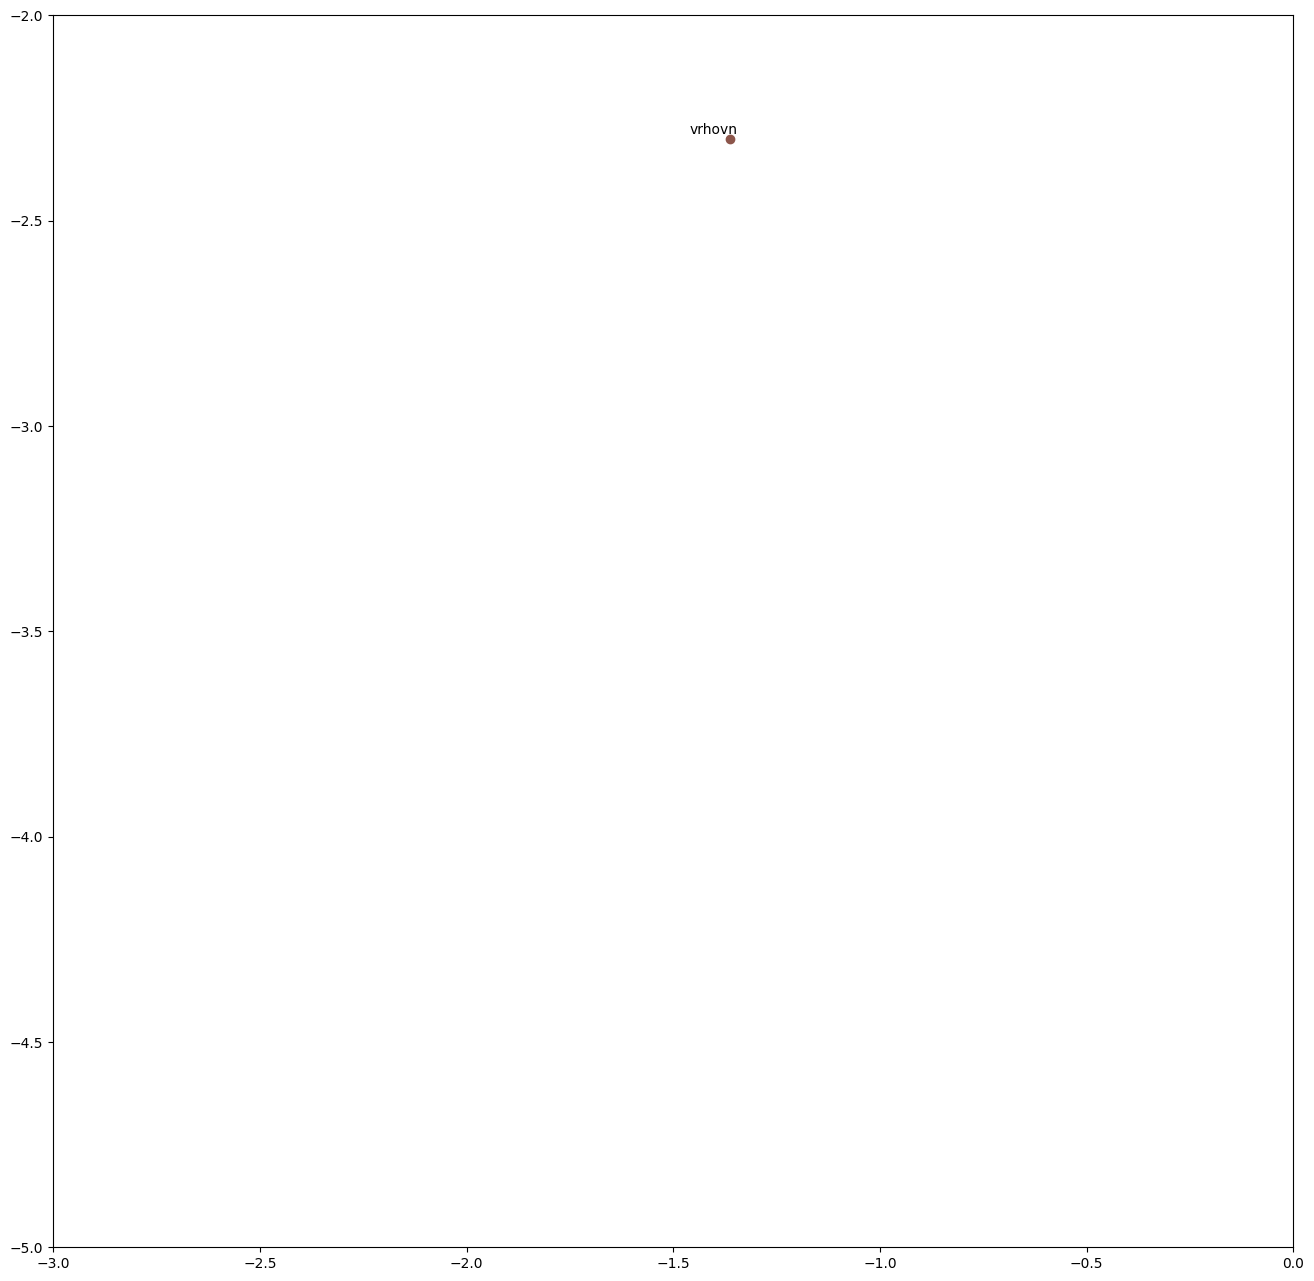

In [ ]:
from cuml.manifold import TSNE
import matplotlib.pyplot as plt
tsne = TSNE(n_components = 2)

word_vectors = wv_model.wv.vectors
vocab = wv_model.wv.index_to_key

embeddings_tsne = tsne.fit_transform(word_vectors)

x = []
y = []
for value in embeddings_tsne:
    x.append(value[0])
    y.append(value[1])
        
plt.figure(figsize=(16, 16)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(vocab[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    
plt.xlim(0, 10)    #ovo nije obavezno, samo je tu da naznaci koji dio plota ce se vizualizirat
plt.ylim(0, 10)    
plt.show()

In [ ]:
chosen_word = stem("virus")

# Find similar words to the chosen word
similar_words = wv_model.wv.most_similar(chosen_word)

# Extract word vectors for plotting
vectors = [wv_model.wv[word] for word, _ in similar_words]
vectors.append(wv_model.wv[chosen_word])

# Plot the word vectors
x_coords = [vector[0] for vector in vectors]
y_coords = [vector[1] for vector in vectors]

fig, ax = plt.subplots()
ax.scatter(x_coords, y_coords)

# Add labels for similar words
for word, _ in similar_words:
    idx = similar_words.index((word, _))
    ax.annotate(word, (x_coords[idx], y_coords[idx]), textcoords="offset points", xytext=(0,10), ha='center')

# Add label for the chosen word
ax.annotate(chosen_word, (x_coords[-1], y_coords[-1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

#Glavna funkcija


*   ime_datoteke_korpus 
*   algorithm - 1 za Word2Vec, 2 za FastText
*   bez_stopriječi - true za izbacivanje stop riječi
*   stemming - true za primjenu steminga







In [ ]:
def napravi_embedding_za_bos(ime_datoteke_korpus, algorithm, bez_stopriječi, stemming):
  with open(ime_datoteke_korpus,"r") as f:
    tekst = f.read()
  preprocesirani_tekst = preprocesiraj(tekst, bez_stopriječi, stemming)
  if algorithm == 1:
    model = Word2Vec(preprocesirani_tekst, min_count=1)
  elif algorithm == 2:
    model = FastText(preprocesirani_tekst, vector_size = 100, window=5, min_count=3, workers=4, sg=1)
  return model

Treba noviju verziju stemminga ubaciti

In [ ]:
def preprocesiraj(text, bez_stopriječi, stemming):

  #segmentacija na rečenice
  #text = tokenize.sent_tokenize(text)

  #tokenizacija sa dodatnim preprocesiranjem popu izbacivanja interpunkcije i sl
  text_list = []
  for sentence in text:
    text_list.append(tokeniziraj(sentence))

  #stop riječi
  if bez_stopriječi:
    text_list = remove_stopwords(text_list, stopwords) #NE RADI

  #stemming
  if stemming:
    stem_text_list = []
    sentence_text_list = []
    for sentence in text_list:
      for word in sentence:
        sentence_text_list.append(stem(word))
      sentence_text_list = []
      stem_text_list.append(sentence_text_list)
    return stem_text_list
  else:
    return text_list

In [ ]:
model = napravi_embedding_za_bos("ekskluzivno_najnovije_vijesti.txt", 2, False, True)

In [ ]:
with open('fasttext_model.pkl', 'wb') as f:
    pickle.dump(ft_model, f)